In [50]:
"""
1. import library
2. problem description - import data
3. missing value
4. EDA
5. outlier
6. feature engineering
7. train-test-split and standardization
8. linear regression
9. regularization (ridge regression - lasso regression - elasticnet)
10. xgboost
11. averaging models

"""

'\n1. import library\n2. problem description - import data\n3. missing value\n4. EDA\n5. outlier\n6. feature engineering\n7. train-test-split and standardization\n8. linear regression\n9. regularization (ridge regression - lasso regression - elasticnet)\n10. xgboost\n11. averaging models\n\n'

In [51]:
# 1. import library


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

#XGBoost
import xgboost as xgb

#warning
import warnings
warnings.filterwarnings('ignore')


In [52]:
# 2. problem description - import data

"""
    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)
"""

'\n    1. mpg:           continuous\n    2. cylinders:     multi-valued discrete\n    3. displacement:  continuous\n    4. horsepower:    continuous\n    5. weight:        continuous\n    6. acceleration:  continuous\n    7. model year:    multi-valued discrete\n    8. origin:        multi-valued discrete\n    9. car name:      string (unique for each instance)\n'

In [53]:
column_name = ["MPG", "Cylinders", "Displacement","Horsepower","Weight","Acceleration","Model Year","Origin"]

In [54]:
data = pd.read_csv("data/auto-mpg.data", names=column_name, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

In [55]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [56]:
data = data.rename(columns={"MPG":"target"})
data.head()

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [57]:
data.shape

(398, 8)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [59]:
data.describe()

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [60]:
# 3. missing value

data.isna().sum()

target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

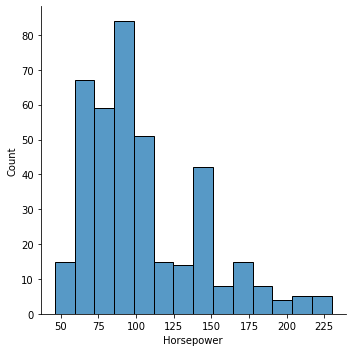

In [61]:
sns.displot(data.Horsepower)

In [62]:
data["Horsepower"] = data["Horsepower"].fillna(data["Horsepower"].mean())

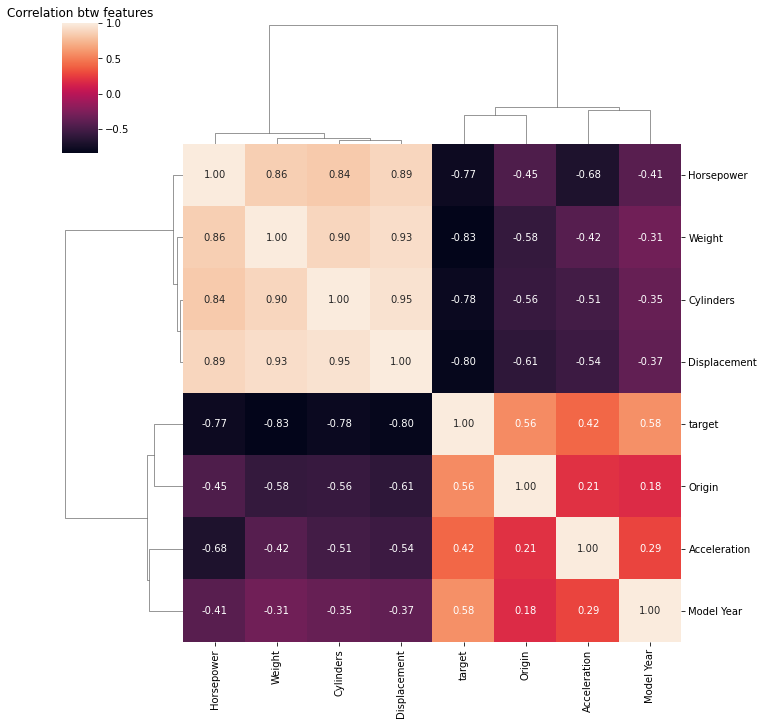

In [63]:
# 4. EDA

corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation btw features")
plt.show()

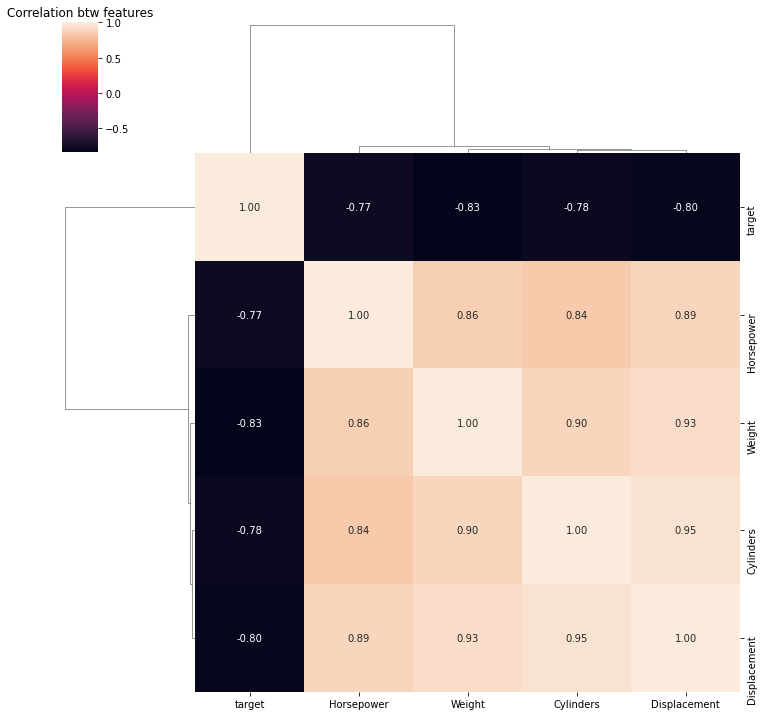

In [64]:
threshold = 0.75
filtre = np.abs(corr_matrix["target"])>threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()


In [65]:
"""
multicollinearity
"""

'\nmulticollinearity\n'

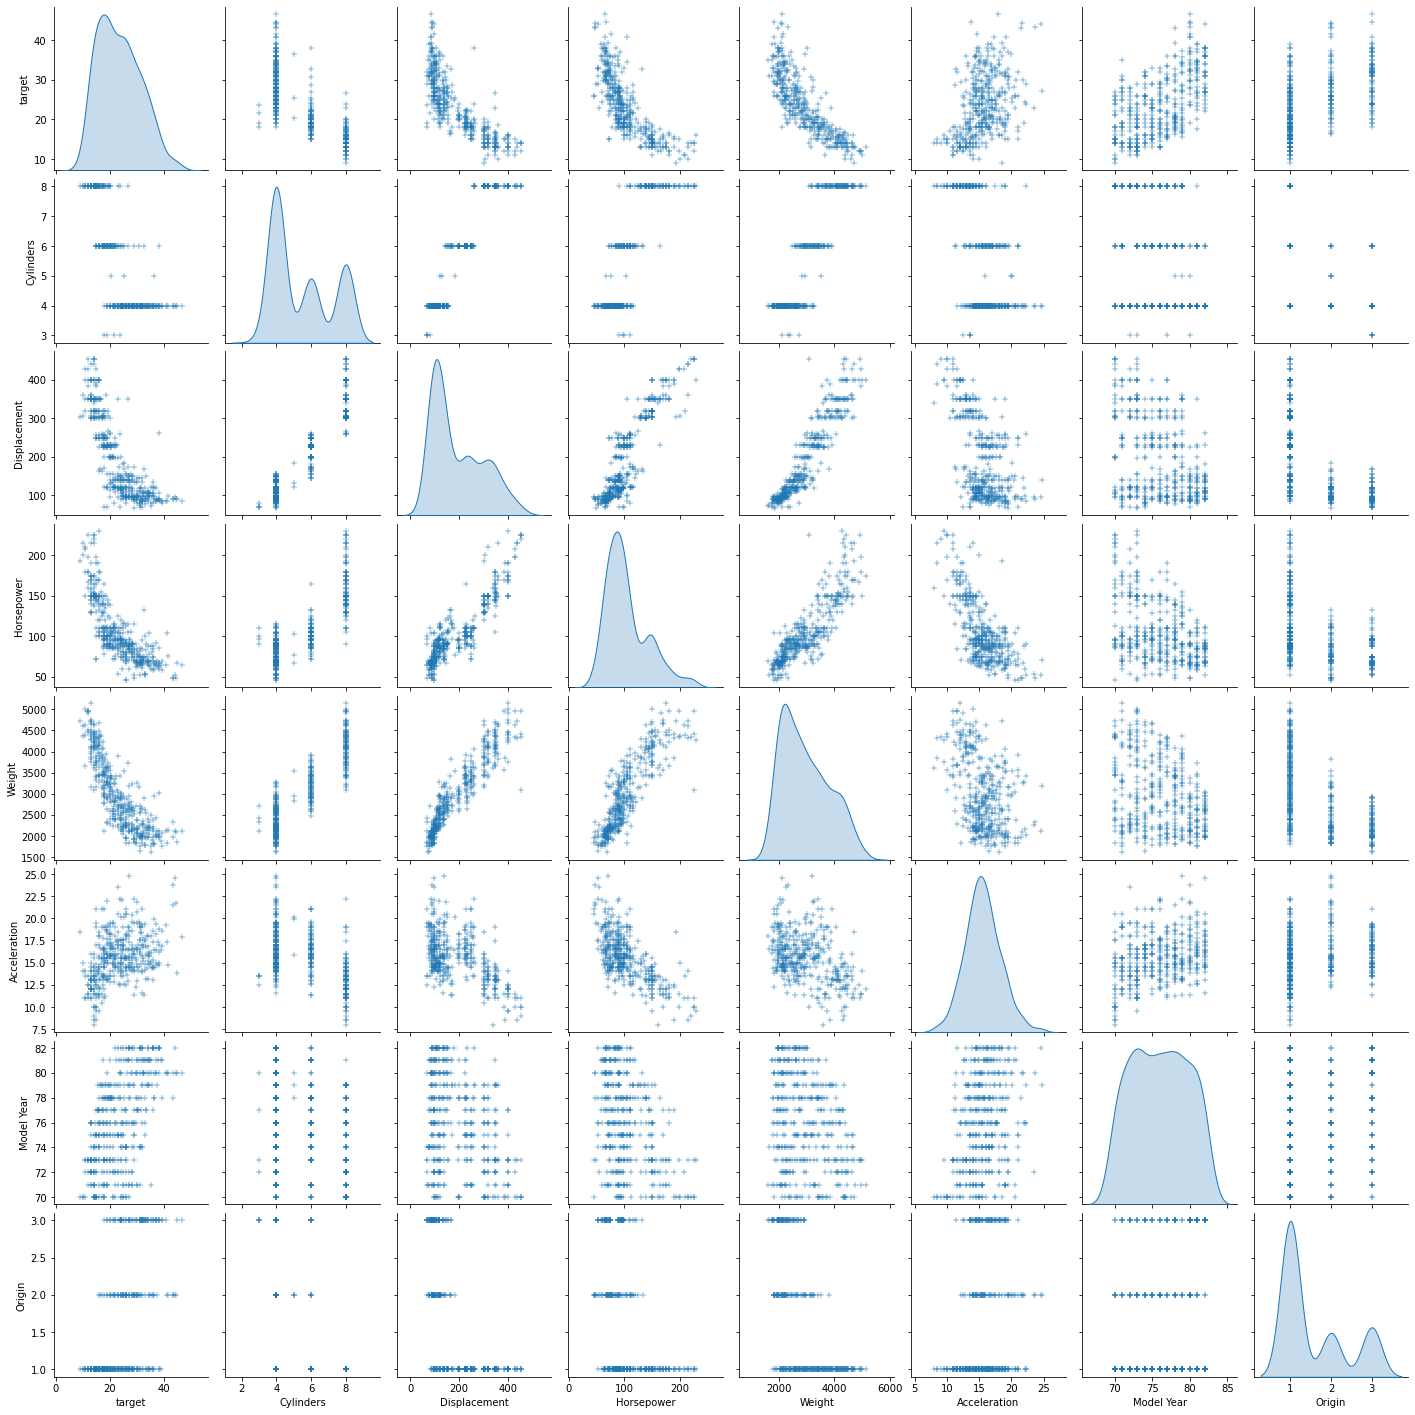

In [66]:
sns.pairplot(data, diag_kind="kde", markers="+")
plt.show()

In [67]:
"""
cylinders and origin can be categorical
"""

'\ncylinders and origin can be categorical\n'

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64
1    249
3     79
2     70
Name: Origin, dtype: int64


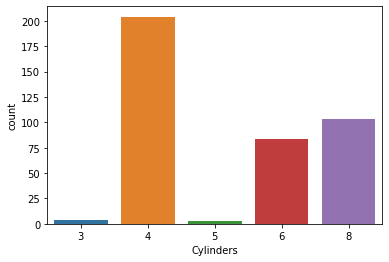

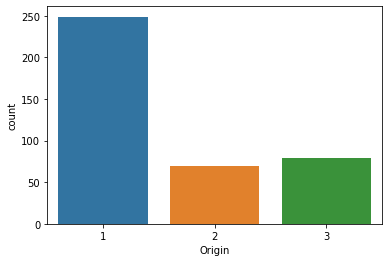

In [68]:
plt.figure()
sns.countplot(data["Cylinders"])
print(data["Cylinders"].value_counts())

plt.figure()
sns.countplot(data["Origin"])
print(data["Origin"].value_counts())

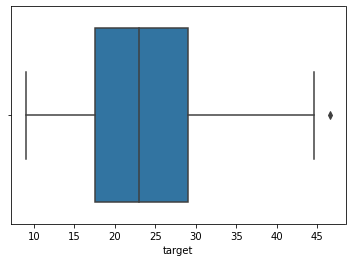

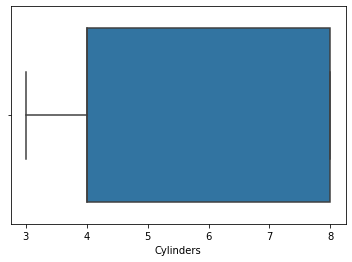

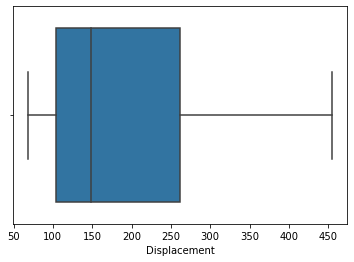

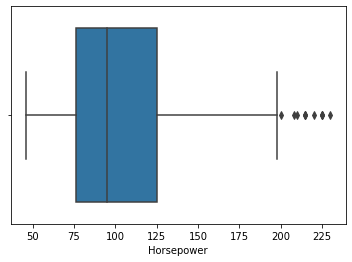

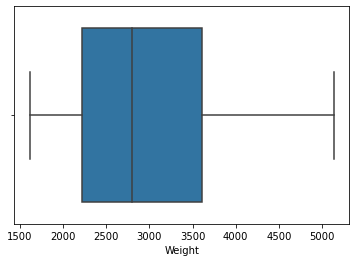

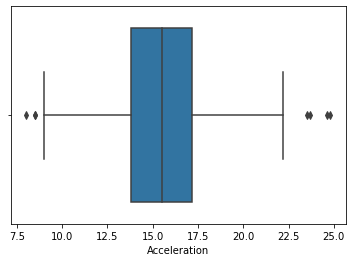

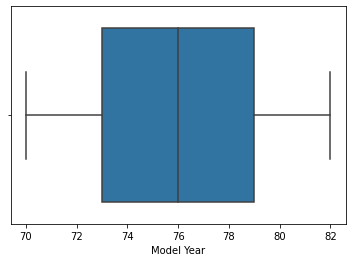

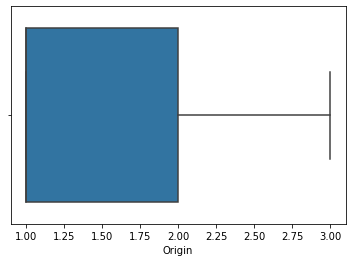

In [69]:
for c in data.columns:
    plt.figure()
    sns.boxplot(x = c, data=data, orient="v")

In [70]:
"""
outlier: horsepower and acceleration
"""

'\noutlier: horsepower and acceleration\n'

In [71]:
thr = 2

hoursepower_dsc = data["Horsepower"]
hoursepower_dsc.describe()

count    398.000000
mean     104.469388
std       38.199187
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: Horsepower, dtype: float64

In [72]:
q1_hp = hoursepower_dsc[6]
q3_hp = hoursepower_dsc[4]
IQR_hp = q1_hp
top_limit_hp = q3_hp + thr*IQR_hp
bottom_limit_hp = q1_hp - thr*IQR_hp
filter_hp_bottom = bottom_limit_hp < data["Horsepower"]
filter_hp_top = data["Horsepower"] < top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_bottom

data = data[filter_hp]


acceleration_desc = data["Acceleration"]
q1_acc = acceleration_desc[6]
q3_acc = acceleration_desc[4]
IQR_acc = q1_acc
top_limit_acc = q3_acc + thr*IQR_acc
bottom_limit_acc = q1_acc - thr*IQR_acc
filter_acc_bottom = bottom_limit_acc < data["Acceleration"]
filter_acc_top = data["Acceleration"] < top_limit_acc
filter_acc = filter_acc_bottom & filter_acc_bottom

data = data[filter_acc]



mu: 23.514572864321607, sigma: 7.806159061274433


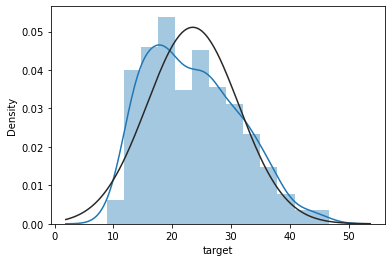

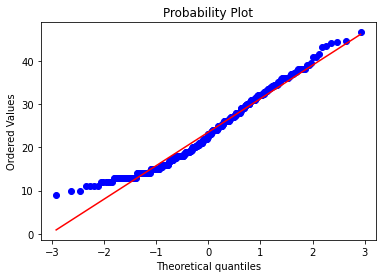

In [73]:
# 6. feature engineering
# skewness

# target dependent variable

sns.distplot(data.target, fit=norm)

(mu, sigma) = norm.fit(data["target"])
print("mu: {}, sigma: {}".format(mu, sigma))

# qq plot

fig = plt.figure()
res = stats.probplot(data["target"], plot=plt)
plt.show()

mu: 3.1478302770344047, sigma: 0.32375928015327066


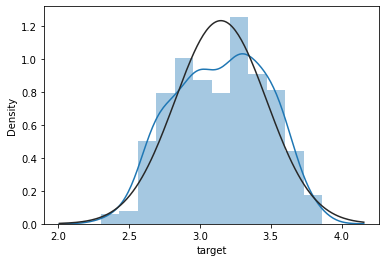

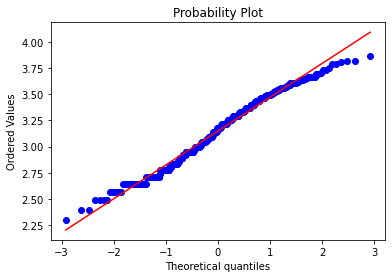

In [74]:
data["target"] = np.log1p(data["target"])
sns.distplot(data["target"], fit=norm)

(mu, sigma) = norm.fit(data["target"])
print("mu: {}, sigma: {}".format(mu, sigma))

fig = plt.figure()
res = stats.probplot(data["target"], plot=plt)
plt.show()


In [75]:
# feature - independent variable

skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewnes = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewnes.head()

# >1 positive <-1 negative skewness

,skewed
Horsepower,1.091419
Origin,0.920291
Displacement,0.716930
Weight,0.529059
Cylinders,0.524934


In [76]:
"""
Box Cox Transformation
"""

'\nBox Cox Transformation\n'

In [77]:
# one hot encoding

data["Cylinders"] = data["Cylinders"].astype(str)
data["Origin"] = data["Origin"].astype(str)


data = pd.get_dummies(data)
data.head()

,target,Displacement,Horsepower,Weight,Acceleration,Model Year,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,2.944439,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,2.772589,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,2.944439,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,2.833213,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,2.890372,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0


In [78]:
# 7. train-test-split and standardization

x = data.drop(["target"],axis=1)
y = data["target"]
test_size=0.9

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

In [79]:
# standardization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [80]:
# 8. linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)
print("LR Coef: ",lr.coef_)
y_predicted_dummy = lr.predict(X_test)
mse = mean_squared_error(y_test, y_predicted_dummy)
print("Linear Regression MSE: ", mse)

LR Coef:  [-1.06060420e-01 -2.01214965e-02 -1.50388965e-01  8.33717409e-04
  8.69887850e-02 -4.06828285e-02  1.30704994e-02 -2.77555756e-17
 -1.21672173e-02  1.28058007e-02  9.86945426e-03  2.58702476e-03
 -1.54903356e-02]
Linear Regression MSE:  0.017202066865378157


Ridge Cof:  [-0.09350529 -0.02527218 -0.14512031 -0.00031224  0.08571775 -0.0379078
  0.01914765  0.         -0.01417617  0.00598734  0.00875576  0.00296882
 -0.01448204]
Ridge Best Estimator:  Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)
Ridge MSE:  0.016838160902293085
----------------------------------


Text(0.5, 1.0, 'Ridge')

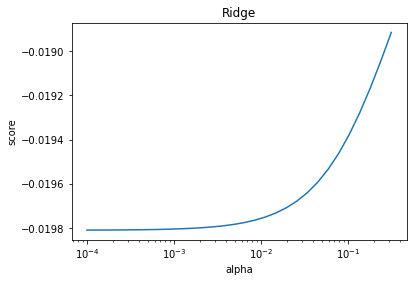

In [81]:
# 9. regularization (ridge regression - lasso regression - elasticnet)

# ridge regression

ridge = Ridge(random_state=42, max_iter=10000)

alphas = np.logspace(-4,-0.5,30)

tuned_paramaters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_paramaters, cv=n_folds, scoring="neg_mean_squared_error", refit=True)
clf.fit(X_train, y_train)
score = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

print("Ridge Cof: ", clf.best_estimator_.coef_)

ridge = clf.best_estimator_
print("Ridge Best Estimator: ", ridge)
y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(y_test, y_predicted_dummy)
print("Ridge MSE: ", mse)
print("----------------------------------")

plt.figure()
plt.semilogx(alphas, score)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")




Lasso Coef:  [-0.01012604 -0.03369735 -0.14555059  0.          0.07465845 -0.00500467
  0.07507603  0.         -0.         -0.         -0.          0.
 -0.        ]
Lasso Best Estimator:  Lasso(alpha=0.014873521072935119, max_iter=10000, random_state=42)
Lasso MSE:  0.013819430799394513
---------------------------------------------------------------


Text(0.5, 1.0, 'Lasso')

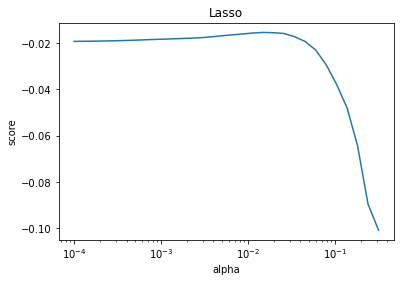

In [82]:

# Lasso Regression (L1)

lasso = Lasso(random_state=42, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error',refit=True)
clf.fit(X_train,y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

print("Lasso Coef: ",clf.best_estimator_.coef_)
lasso = clf.best_estimator_
print("Lasso Best Estimator: ",lasso)

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(y_test,y_predicted_dummy)
print("Lasso MSE: ",mse)
print("---------------------------------------------------------------")

plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")

In [83]:
# ElasticNet

parametersGrid = {"alpha": alphas,
                  "l1_ratio": np.arange(0.0, 1.0, 0.05)}

eNet = ElasticNet(random_state=42, max_iter=10000)
clf = GridSearchCV(eNet, parametersGrid, cv=n_folds, scoring='neg_mean_squared_error', refit=True)
clf.fit(X_train, y_train)


print("ElasticNet Coef: ",clf.best_estimator_.coef_)
print("ElasticNet Best Estimator: ",clf.best_estimator_)


y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(y_test,y_predicted_dummy)
print("ElasticNet MSE: ",mse)


ElasticNet Coef:  [-0.0139838  -0.03286845 -0.14495576  0.          0.07519167 -0.00670162
  0.07309211  0.         -0.         -0.         -0.          0.
 -0.        ]
ElasticNet Best Estimator:  ElasticNet(alpha=0.014873521072935119, l1_ratio=0.9500000000000001,
           max_iter=10000, random_state=42)
ElasticNet MSE:  0.013850933946000106


In [84]:
"""
StandardScaler
    Linear Regression MSE:  0.020632204780133015
    Ridge MSE:  0.019725338010801216
    Lasso MSE:  0.017521594770822522
    ElasticNet MSE:  0.01749609249317252
RobustScaler:
    Linear Regression MSE:  0.020984711065869643
    Ridge MSE:  0.018839299330570554
    Lasso MSE:  0.016597127172690837
    ElasticNet MSE:  0.017234676963922273  
"""

'\nStandardScaler\n    Linear Regression MSE:  0.020632204780133015\n    Ridge MSE:  0.019725338010801216\n    Lasso MSE:  0.017521594770822522\n    ElasticNet MSE:  0.01749609249317252\nRobustScaler:\n    Linear Regression MSE:  0.020984711065869643\n    Ridge MSE:  0.018839299330570554\n    Lasso MSE:  0.016597127172690837\n    ElasticNet MSE:  0.017234676963922273  \n'

In [85]:
# 10. xgboost

![Screenshot 2023-08-08 154713.png](<attachment:Screenshot 2023-08-08 154713.png>)
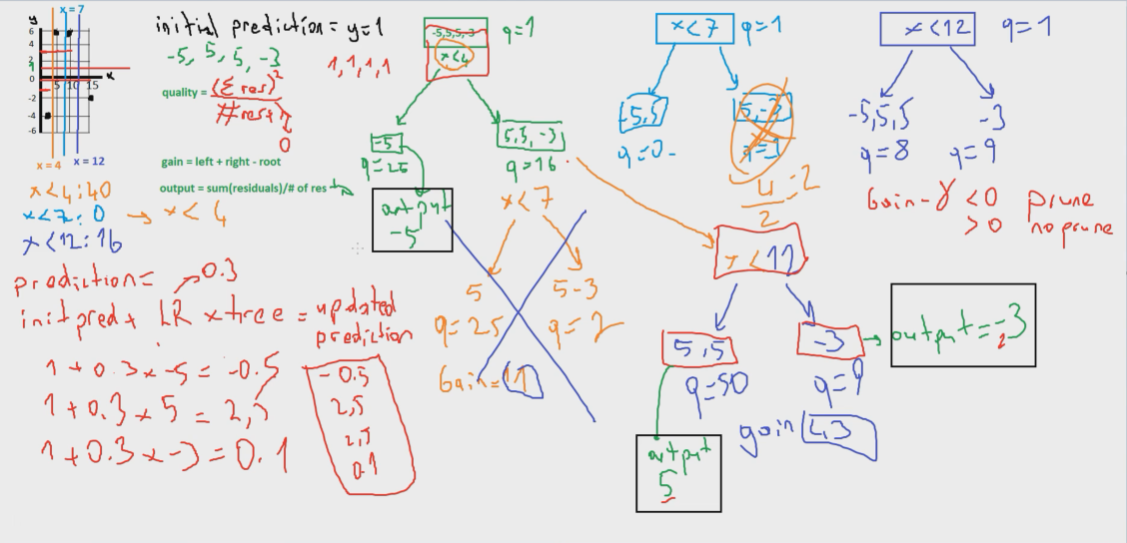

In [88]:
# XGBoost
parametersGrid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000]}

model_xgb = xgb.XGBRegressor()

clf = GridSearchCV(model_xgb, parametersGrid, cv = n_folds, scoring='neg_mean_squared_error', refit=True, n_jobs = 5, verbose=True)

clf.fit(X_train, y_train)
model_xgb = clf.best_estimator_

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(y_test,y_predicted_dummy)
print("XGBRegressor MSE: ",mse)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[15:49:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:49:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBRegressor MSE:  0.016449959649247343


In [89]:
# 11. averaging models

class AveragingModels():
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)  


averaged_models = AveragingModels(models = (model_xgb, lasso))
averaged_models.fit(X_train, y_train)

y_predicted_dummy = averaged_models.predict(X_test)
mse = mean_squared_error(y_test,y_predicted_dummy)
print("Averaged Models MSE: ",mse)

[15:52:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Averaged Models MSE:  0.013281268979596668


In [ ]:
"""
StandardScaler:
    Linear Regression MSE:  0.020632204780133015
    Ridge MSE:  0.019725338010801216
    Lasso MSE:  0.017521594770822522
    ElasticNet MSE:  0.01749609249317252
    XGBRegressor MSE: 0.017167257713690008
    Averaged Models MSE: 0.016034769734972223
RobustScaler:
    Linear Regression MSE:  0.020984711065869643
    Ridge MSE:  0.018839299330570554
    Lasso MSE:  0.016597127172690837
    ElasticNet MSE:  0.017234676963922273
    XGBRegressor MSE: 0.01753270469361755
    Averaged Models MSE: 0.0156928574668921
"""